### Домашнее задание "Случайные марковские процессы"

In [93]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline

In [94]:
text = " "
for i in range(1, 5):
    with open(f'tom_{i}.txt', 'r',  encoding='utf-8') as f:
        tom = f.read().lower()
    text = text + re.sub('[^а-я ]','', tom)

In [95]:
text[:500]

' лев толстойвойна и миртом   том часть перваячасть ораячасть третья  том лев николаевич толстойвойна и миртом часть первая е              поместья                                                       мой верный раб    ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист  я вас больше не знаю вы уж не друг мо'

In [99]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [100]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [101]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [102]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [103]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

Матрица переходных вероятностей

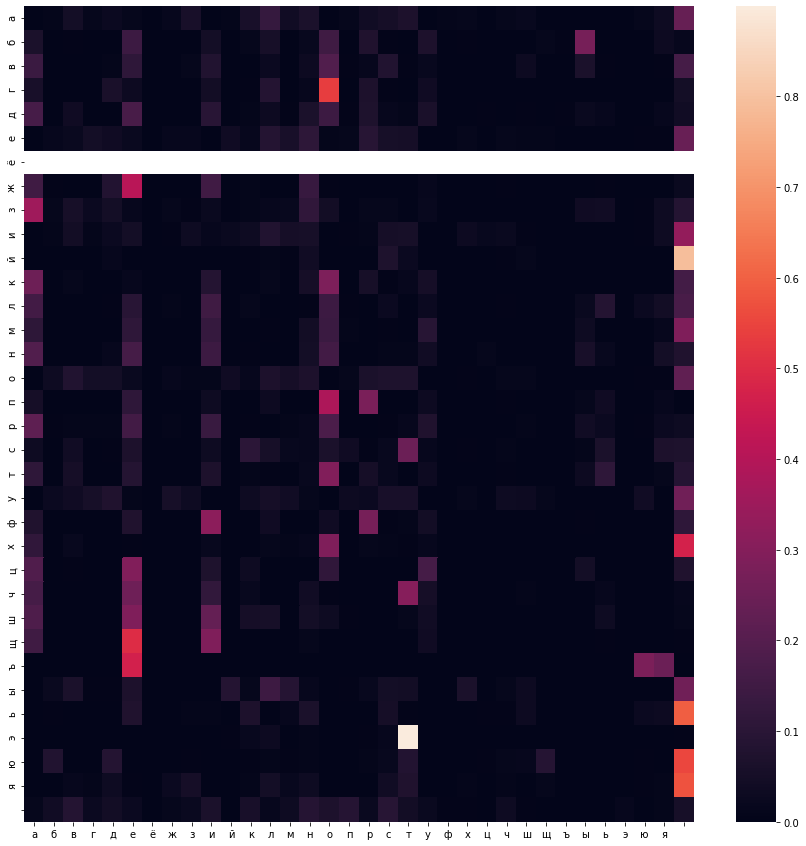

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(df)
plt.show()

Вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [105]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2095790878783555e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.840852058790128e-06
палр 3.3611556905914123e-09
памр 1.0930948458598652e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.531903526415092e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
па р 8.697579884154568e-06
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.685575343020761e-10
пвер 5.0598785244545456e-09
пвжр 3.909391636356634e-15
пвзр 8.485947199

Сгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8 символов

In [106]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бятоссдег


Возьмем ряд и оценим его через HMM

In [76]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")["Count"]

In [77]:
values = series.values.reshape(-1,1)

In [138]:
# возьмем 10 компонент
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


In [139]:
cur_value = labels[-1]
predictions = []
for _ in range(10):
    cur_value = np.random.choice(10, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [140]:
new_series = np.concatenate((values, np.array(predictions)))

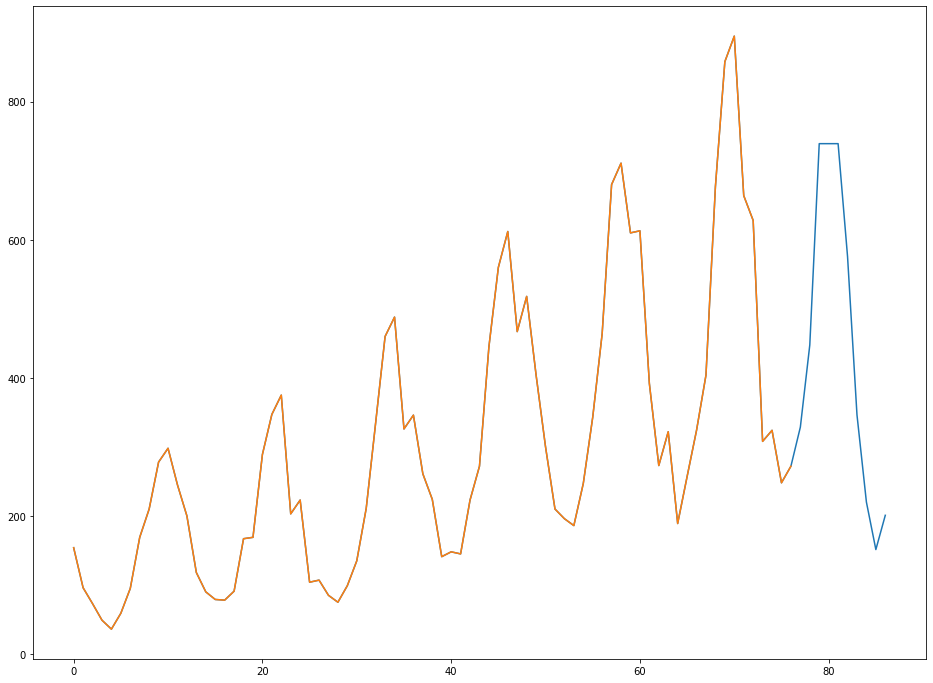

In [141]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()